Model Coefficients:
Intercept: -1.0837
Coefficients: [0.82122323 2.31744463]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.87      0.81      0.84        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150


Confusion Matrix:
[[66  9]
 [14 61]]

Accuracy: 0.8467


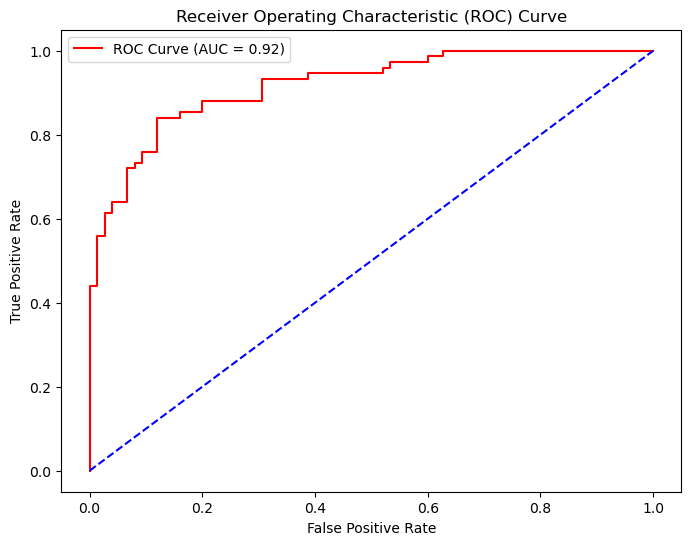

In [1]:
#Logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


X, y = make_classification(
    n_samples=500,  
    n_features=2,  
    n_informative=2,  
    n_redundant=0, 
    n_clusters_per_class=1,  
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  


print("Model Coefficients:")
print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Coefficients: {model.coef_[0]}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

#This will return the accuracy score of the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  #for diagional line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()
